# TSAI Assignment 7 - Code 2

### Model2:
##### Target
Improve accuracy 
(Trying to improve accuracy by increasing receptivity fiels. Start with 4 output channels. Keep on convoluting, (with o/p channels doubling in every layer) until a decent receptivity field of input image is received. 
Use maxpooling much earlier, so that a decent receptivity field(26/28) is achieved with less channels.)
##### Result
Model parameters - 396,234
Train Accuracy - 99.38
Validation Accuracy - 98.96
##### Analysis
Accuracy improved drastically when receptivity field is increased

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 2

In [5]:
from models import model_2
myNextModel = model_2.getModel()

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_2.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=2.2928 Batch_id=117 Accuracy=10.92: 100%|████████████████████████████████| 118/118 [00:30<00:00,  3.83it/s]


Test set: Average loss: 2.2984, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.8832 Batch_id=117 Accuracy=19.90: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.70it/s]


Test set: Average loss: 1.9500, Accuracy: 3662/10000 (36.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2586 Batch_id=117 Accuracy=82.21: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.16it/s]


Test set: Average loss: 0.2250, Accuracy: 9280/10000 (92.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0557 Batch_id=117 Accuracy=93.98: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.89it/s]


Test set: Average loss: 0.1711, Accuracy: 9456/10000 (94.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1083 Batch_id=117 Accuracy=95.87: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.35it/s]


Test set: Average loss: 0.0957, Accuracy: 9712/10000 (97.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1534 Batch_id=117 Accuracy=96.87: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.46it/s]


Test set: Average loss: 0.1044, Accuracy: 9665/10000 (96.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0533 Batch_id=117 Accuracy=97.38: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.99it/s]


Test set: Average loss: 0.0732, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0538 Batch_id=117 Accuracy=97.86: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.00it/s]


Test set: Average loss: 0.0716, Accuracy: 9772/10000 (97.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0205 Batch_id=117 Accuracy=98.10: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.46it/s]


Test set: Average loss: 0.0624, Accuracy: 9802/10000 (98.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0839 Batch_id=117 Accuracy=98.32: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.46it/s]


Test set: Average loss: 0.0572, Accuracy: 9824/10000 (98.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0480 Batch_id=117 Accuracy=98.53: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.10it/s]


Test set: Average loss: 0.0650, Accuracy: 9793/10000 (97.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0253 Batch_id=117 Accuracy=98.66: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.01it/s]


Test set: Average loss: 0.0473, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0444 Batch_id=117 Accuracy=98.85: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.70it/s]


Test set: Average loss: 0.0588, Accuracy: 9824/10000 (98.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0645 Batch_id=117 Accuracy=98.86: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.93it/s]


Test set: Average loss: 0.0516, Accuracy: 9831/10000 (98.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0043 Batch_id=117 Accuracy=98.96: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.04it/s]


Test set: Average loss: 0.0479, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0065 Batch_id=117 Accuracy=99.49: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.41it/s]


Test set: Average loss: 0.0411, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0051 Batch_id=117 Accuracy=99.59: 100%|████████████████████████████████| 118/118 [00:09<00:00, 11.92it/s]


Test set: Average loss: 0.0406, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0060 Batch_id=117 Accuracy=99.61: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.38it/s]


Test set: Average loss: 0.0406, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0327 Batch_id=117 Accuracy=99.64: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.97it/s]


Test set: Average loss: 0.0403, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0012 Batch_id=117 Accuracy=99.67: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.08it/s]


Test set: Average loss: 0.0412, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-03.


Print the model summary to know your model

In [7]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
            Conv2d-3            [-1, 8, 24, 24]             296
              ReLU-4            [-1, 8, 24, 24]               0
         MaxPool2d-5            [-1, 8, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           1,168
              ReLU-7           [-1, 16, 10, 10]               0
            Conv2d-8             [-1, 32, 8, 8]           4,640
              ReLU-9             [-1, 32, 8, 8]               0
           Conv2d-10             [-1, 64, 6, 6]          18,496
             ReLU-11             [-1, 64, 6, 6]               0
           Conv2d-12            [-1, 128, 4, 4]          73,856
             ReLU-13            [-1, 128, 4, 4]               0
           Conv2d-14            [-1, 25

Plot the train and test accuracy

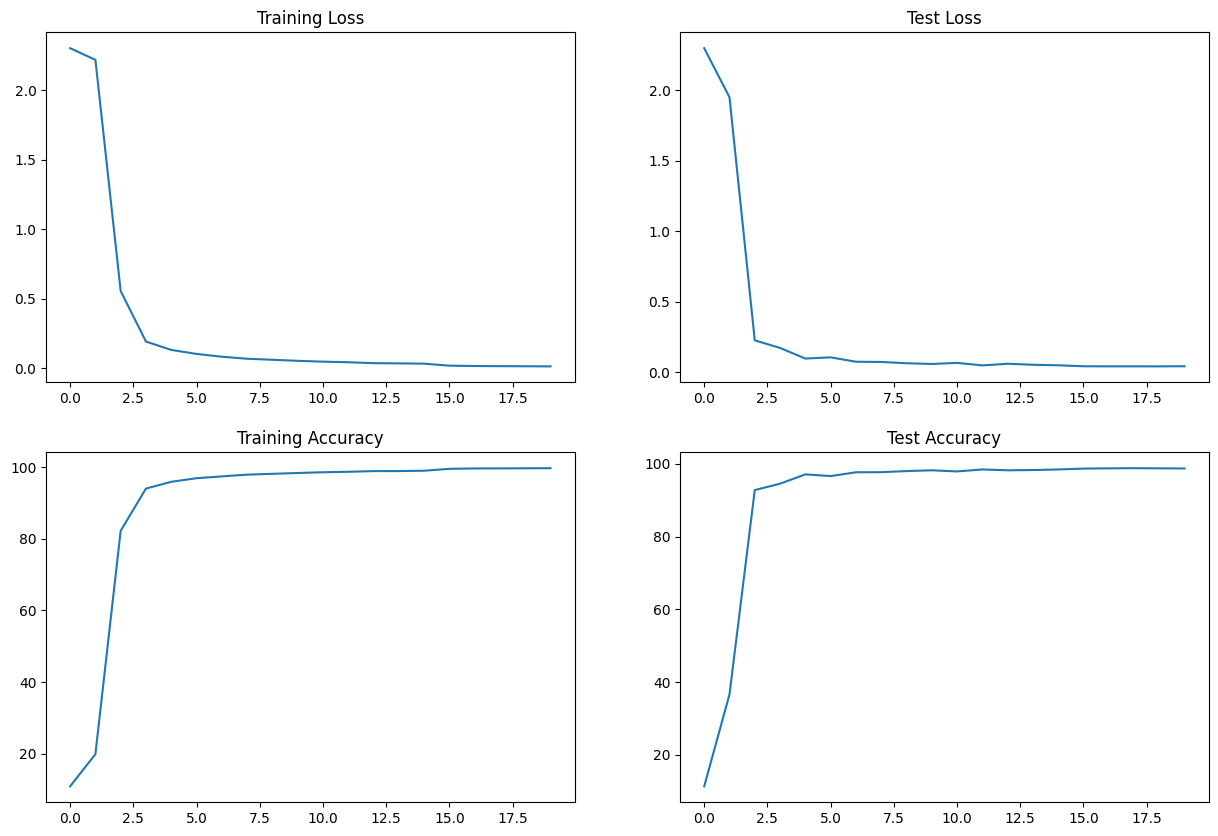

In [8]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)